In [10]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [11]:
df=pd.read_csv(r"C:\Users\shree\OneDrive\Documents\my excel\Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
x=df[["Pclass","Sex","Age"]]
y=df.Survived

In [14]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
dtype: int64

In [30]:
x.Age.fillna(x.Age.mean(),inplace=True)
x

,Pclass,Age,Gender
0,3,22.000000,1
1,1,38.000000,0
2,3,26.000000,0
3,1,35.000000,0
4,3,35.000000,1
...,...,...,...
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1


converting string(sex) value into numerical(0/1) value 

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
gen=le.fit_transform(x.Gender)

male=1 female=0

In [36]:
x["Gender"]=gen

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [39]:
len(train_x)

712

In [40]:
len(test_x)

179

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model=LogisticRegression()

In [43]:
model.fit(train_x,train_y)

LogisticRegression()

In [44]:
model.score(test_x,test_y)

0.7430167597765364

In [45]:
x.head()

,Pclass,Age,Gender
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1


In [47]:
if model.predict([[1,34,0]])[0]==1:
    print("survived")
else:
    print("not survived")

survived


In [49]:
if model.predict([[3,74,1]])[0]==1:
    print("survived")
else:
    print("not survived")

not survived


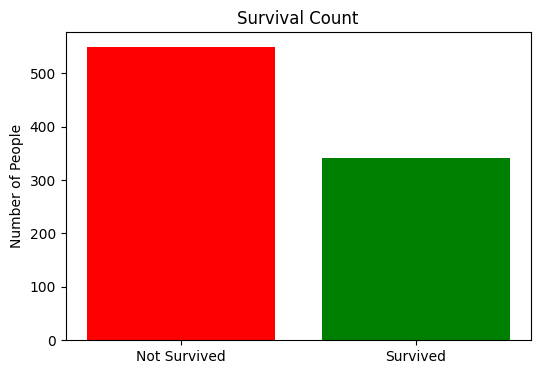

In [50]:
import matplotlib.pyplot as plt


survival_counts = df['Survived'].value_counts()

# bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Not Survived', 'Survived'], survival_counts, color=['red', 'green'])
plt.title('Survival Count')
plt.ylabel('Number of People')
plt.show()


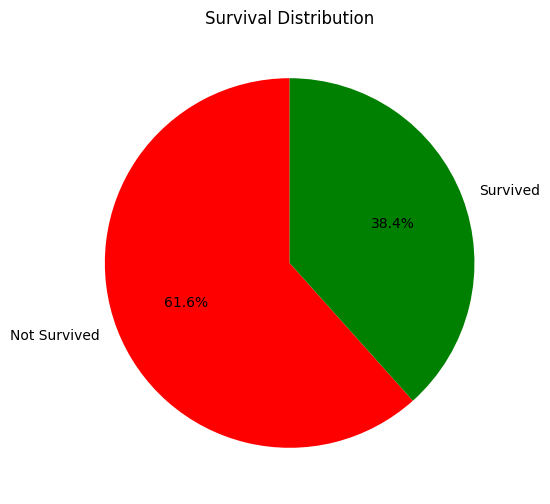

In [51]:
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.title('Survival Distribution')
plt.show()
